In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [78]:
def f(x):
    return 3*x**2 - 4*x + 5

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [79]:
f(3.0)

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


20.0

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


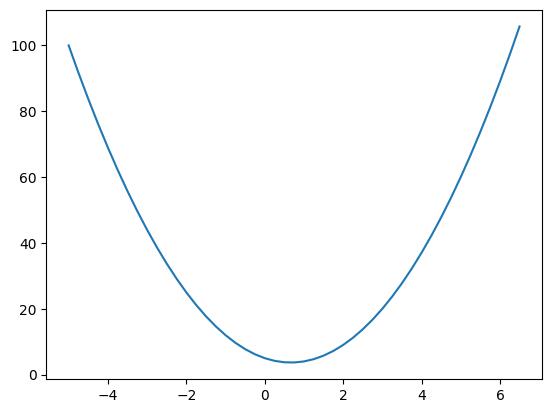

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [80]:
xs = np.arange(-5,6.75, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [81]:
h = 0.0001
x = 2/3
(f(x + h) - f(x))/h

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


0.0002999999981767587

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [82]:
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print("d1",d1)
print("d2",d2)
slope = (d2-d1)/h
print("slope = ", slope)

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
d1 4.0
d2 3.999699999999999
slope =  -3.000000000010772
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [83]:
class Value:
    def __init__(self, data, _children=(), _op='', label=""):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __rmul__(self, other):
        return self * Value(other)
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self,), 'exp')

        def _backward():
           self.grad += out.data * out.grad
        out._backward = _backward
        return out

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), _op="+")
        
        def _backward():
           self.grad += 1.0 * out.grad
           other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), _op="*")

        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __truediv__(self, other):
        return self * other**-1

    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        return self + (-other)

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data ** other, (self, ), _op=f"**{other}")

        def _backward():
            self.grad += (other) * (self.data ** (other-1)) * out.grad
        out._backward = _backward
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2 * self.data) - 1) / (math.exp(2 * self.data) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out
    
    def backward(self):
        topology = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topology.append(v)
        build_topo(self)

        self.grad = 1.0
        for node in reversed(topology):
            node._backward()



a = Value(2.0, label="a")
b = Value(-3.0, label="b")
c = Value(10, label="c")
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label="f")
L = d * f; L.label = "L"
print(L)

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
Value(data=-8.0)
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


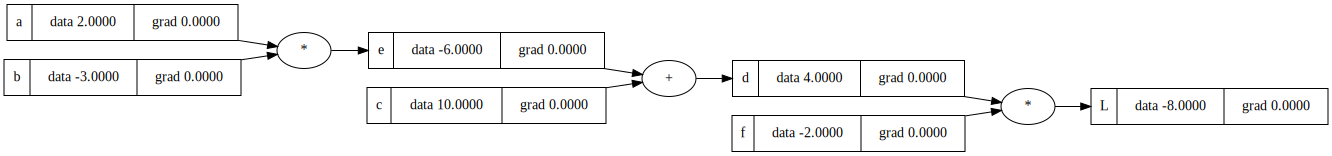

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [84]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape="record")

        if n._op:
            dot.node(name = uid + n._op, label= n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

draw_dot(L)

In [85]:
def gradient_check():
    h = 0.001

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10, label="c")
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label="f")
    L = d * f; L.label = "L"
    L1 = L.data

    a = Value(2.0, label="a")
    b = Value(-3.0, label="b")
    c = Value(10, label="c")
    b.data += h
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label="f")
    L = d * f; L.label = "L"
    L2 = L.data

    print((L2-L1)/h)

gradient_check()

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
-3.9999999999995595
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


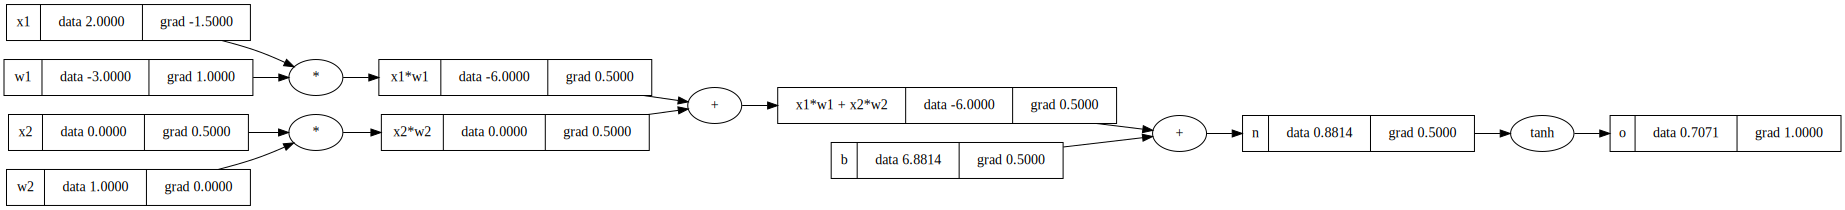

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [86]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

o = n.tanh()
o.grad = 1.0
o.label = 'o'

# o._backward()
# n._backward()
# x1w1x2w2._backward()
# b._backward()
# x1w1._backward()
# x2w2._backward()
# x1._backward()
# w1._backward()
# x2._backward()
# w2._backward()

# o.grad = 1.0
# for node in reversed(topology):
#     node._backward()

o.backward()

draw_dot(o)


In [87]:
a = Value(2.0)
b = Value(4.0)
a/b
a-b

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


Value(data=-2.0)

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


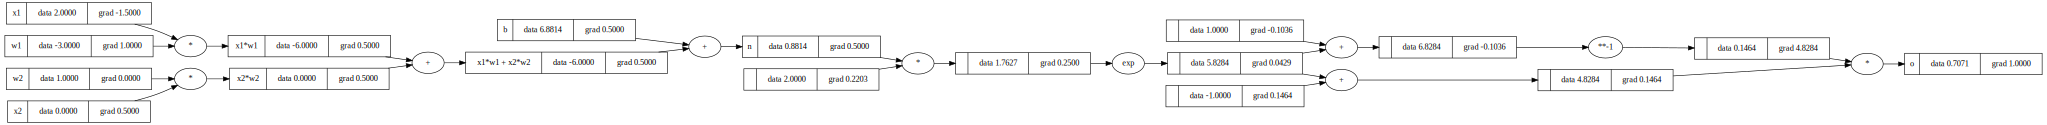

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [88]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1 * w1; x1w1.label = 'x1*w1'
x2w2 = x2 * w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n' 

e = (2*n).exp()
o = (e - 1) / (e + 1)

o.label = 'o'
o.backward()
draw_dot(o)


## Pytorch implementation

In [94]:
import torch

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [95]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()

print("----")
print("x2", x2.grad.item())
print("w2", w2.grad.item())
print("x1", x1.grad.item())
print("w1", w1.grad.item())

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
0.7071066904050358
----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


## Neuron implementation

In [ ]:
import random
class Neuron:

    def __init__(self, nin):
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
    
    def __call__(self, x):
        activation  = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = activation.tanh()
        return out

x = [2.0, 3.0]
neuron = Neuron(2)
neuron(x)

class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

x = [2.0, 3.0]
n = Layer(2,3)
n(x)



class MLP:

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
    
    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        return x

x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x).data

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


0.8756494028269415

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


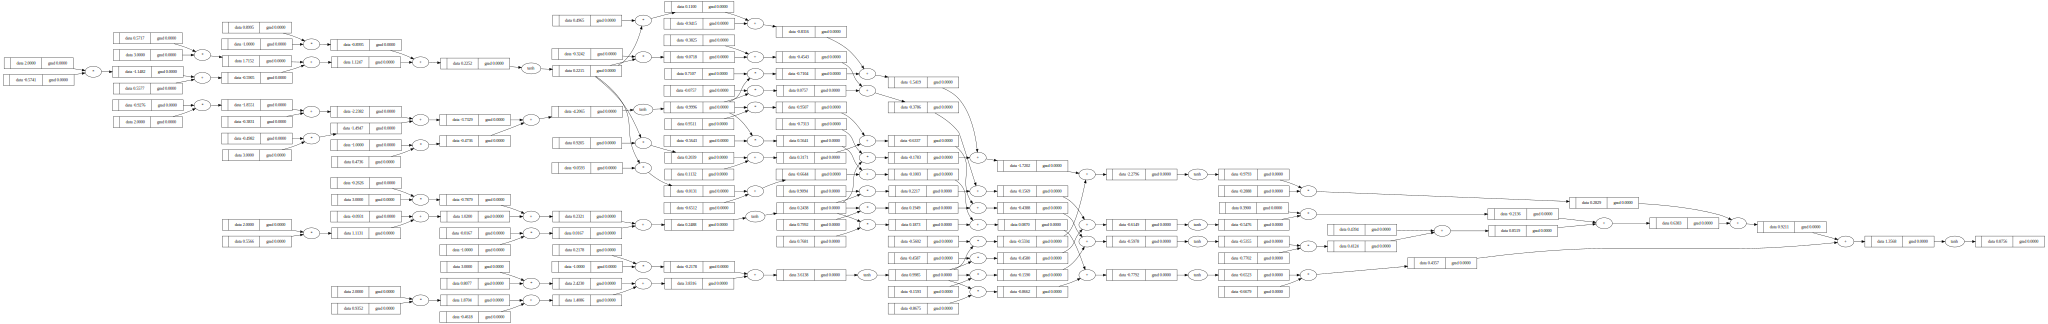

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


In [140]:
draw_dot(n(x))

In [145]:
xs = [
    [3.0, 2.0, -1.0],
    [3.0, -2.0, 1.0],
    [4.0, 1.0, 1.0],
    [-1.0, 5.0, 1.0],
]

ys = [1.0, -1.0, -1.0, -1.0]
ypred = [n(x) for x in xs]
ypred

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py


[Value(data=0.9208535611366444),
 Value(data=0.8968032816631354),
 Value(data=0.8555206367367646),
 Value(data=0.8849457900097331)]

/home/jayanth/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py
